In [1]:
import os
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import random
import glob
import pandas as pd

In [ ]:
data_root = '/media/SSD/vimeo_septuplet/vimeo_septuplet/'
image_root = os.path.join(data_root, 'sequences')
data_root

In [ ]:
image_root

In [ ]:
test_fn = os.path.join(data_root, 'sep_testlist.txt')
test_fn

In [ ]:
with open(test_fn, 'r') as f:
        testlist = f.read().splitlines()

In [ ]:
testlist

In [ ]:
len(testlist)

In [ ]:
imgpath = os.path.join(image_root, testlist[0])
imgpath

In [ ]:
imgpaths = [imgpath + f'/im{i}.png' for i in range(1,8)]
imgpaths

In [ ]:
pth_ = imgpaths
pth_

In [ ]:
 # Load images
images = [Image.open(pth) for pth in imgpaths]
images

In [ ]:
gt = images[len(images)//2]
gt

In [ ]:
len(images)//2

---------------------

In [ ]:
data_root = '/media/SSD/rheology_data/Glycerol-water-mixtures/GLY10P100/2/'
data_root
#test_fn = os.path.join(data_root, '*-train4line.txt')
test_fn = glob.glob(f"{data_root}*-train4line.txt")
test_fn = test_fn[0]
test_fn

# with open(test_fn, 'r') as txt:
#      sequence_list = [line.strip() for line in txt]
# for seq in sequence_list:
#     img0_path, img1_path = seq.split(' ')

In [ ]:
# with open(test_fn, 'r') as f:
#         testlist = f.read().splitlines()

In [ ]:
meta_data = []
with open(test_fn, 'r') as txt:
     sequence_list = [line.strip() for line in txt]
for seq in sequence_list:
    img1_path, img2_path, img3_path, img4_path = seq.split(' ')
    meta_data.append([img1_path,img2_path,img3_path,img4_path])

In [ ]:
print(len(meta_data))
meta_data

In [ ]:
imgpaths = meta_data[0]
imgpaths

In [ ]:
# pth_ = imgpaths
# pth_

In [ ]:
 # Load images
images = [Image.open(img).convert('RGB') for img in imgpaths]
images

In [ ]:
transforms = transforms.Compose([
                transforms.ToTensor()
            ])

In [ ]:
images = [transforms(img) for img in images]
images

In [ ]:
len(images)

In [ ]:
sizes = images[0].shape
sizes

In [ ]:
#  # Load images
# images = [Image.open(pth) for pth in imgpaths]
# images

In [ ]:
images[0]

In [ ]:
name = imgpaths[-1]
name

In [ ]:
name0 = imgpaths[0]
name0 = name0[-1]
name0

In [ ]:
name0 = imgpaths[-1]
name0

In [ ]:
name = imgpaths[-1]


save_path = '/media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-demo/'
name_ = name.split('/')
name_ = name_[5:8]
name_ = '/'.join(name_)
name_

In [ ]:
save_path = save_path+name_+'_FLAVR/'
save_path

In [ ]:
os.path.basename(name).split('.')[0]+'_inter'+'.png'

In [ ]:
os.path.join(save_path, os.path.basename(name).split('.')[0]+'_inter'+'.png')

In [ ]:
name2 = imgpaths[1]
name2
name2_ = name2.split('/')
name2_ = name2_[5:8]
name2_ = '/'.join(name2_)
name2_

In [ ]:
name3 = imgpaths[2]
name3_ = name3.split('_')[-1]
name3_ = name3_.split('.')[0]
name3_

In [ ]:
save_path0 = '/media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-demo/'
save_path = save_path0+name2_+'/'
out_name = os.path.join(save_path, os.path.basename(name2).split('.')[0]+'inter'+name3_+'.png')
out_name

## Check Predict Frame Interpolation

In [ ]:
import cv2
import matplotlib.pyplot as plt

imgpaths = '/media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-demo/GLY10P100/2/GLY10P100_D0_30HZ_20XINF_UWELL_20220721_124736/GLY10P100_D0_30HZ_20XINF_UWELL_20220721_124736_0000000004_inter.png'
name_im = imgpaths.split('/')[-1]
#print(name_im)
image = cv2.imread(imgpaths)
sZ = os.path.getsize(imgpaths)
print(f"Images Name : **{name_im}, --> Shape ", image.shape)
print(f"image size: {sZ:,} bytes")
plt.axis("off")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

----------------

## Data Train Loader

In [ ]:
data_root = '/media/SSD/vimeo_septuplet/vimeo_septuplet/'
image_root = os.path.join(data_root, 'sequences')
data_root

In [ ]:
train_fn = os.path.join(data_root, 'sep_trainlist.txt')
train_fn

In [ ]:
with open(train_fn, 'r') as f:
        train_fn = f.read().splitlines()

In [ ]:
train_fn

In [ ]:
len(train_fn)

In [ ]:
transforms = transforms.Compose([
                transforms.RandomCrop(256),
                transforms.RandomHorizontalFlip(0.5),
                transforms.RandomVerticalFlip(0.5),
                transforms.ColorJitter(0.05, 0.05, 0.05, 0.05),
                transforms.ToTensor()
            ])

In [ ]:
imgpath = os.path.join(image_root, train_fn[0])
imgpath

In [ ]:
imgpaths = [imgpath + f'/im{i}.png' for i in range(1,8)]
imgpaths

In [ ]:
pth_ = imgpaths
pth_

In [ ]:
 # Load images
images = [Image.open(pth) for pth in imgpaths]
images

In [ ]:
inputs = "1357"

In [ ]:
## Select only relevant inputs
## ***--- return images, [gt] ---*** 
inputs = [int(e)-1 for e in list(inputs)]
inputs = inputs[:len(inputs)//2] + [3] + inputs[len(inputs)//2:]
images = [images[i] for i in inputs]
# imgpaths = [imgpaths[i] for i in inputs]

In [ ]:
inputs

In [ ]:
images

In [ ]:
# Data augmentation
seed = random.randint(0, 2**32)
images_ = []
for img_ in images:
    random.seed(seed)
    images_.append(transforms(img_))
images = images_

# Random Temporal Flip
if random.random() >= 0.5:
    images = images[::-1]
    imgpaths = imgpaths[::-1]

In [ ]:
print(len(images))
images

In [ ]:
gt = images[len(images)//2]
gt

In [ ]:
len(images)//2

In [ ]:
images = images[:len(images)//2] + images[len(images)//2+1:]
print(len(images))
images

In [ ]:
len(images)//2

In [ ]:
len(images)//2+1

## 🌺 Ours [5-Frame]

In [ ]:
data_root = '/media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train-5frame/'
image_root = os.path.join(data_root, 'sequences')

In [ ]:
data_root

In [ ]:
image_root

In [ ]:
train_fn = os.path.join(data_root, 'sep_trainlist_Nf1.txt')
train_fn

In [ ]:
with open(train_fn, 'r') as f:
        train_fn = f.read().splitlines()
train_fn

In [ ]:
transforms = transforms.Compose([
                transforms.RandomCrop(256),
                transforms.RandomHorizontalFlip(0.5),
                transforms.RandomVerticalFlip(0.5),
                transforms.ColorJitter(0.05, 0.05, 0.05, 0.05),
                transforms.ToTensor()
            ])

In [ ]:
imgpath = os.path.join(image_root, train_fn[0])
imgpath

In [ ]:
imgpaths = [imgpath + f'/im{i}.png' for i in range(1,6)]
imgpaths

In [ ]:
pth_ = imgpaths
pth_

In [ ]:
 # Load images
images = [Image.open(pth) for pth in imgpaths]
images

In [ ]:
# Data augmentation
seed = random.randint(0, 2**32)
images_ = []
for img_ in images:
    random.seed(seed)
    images_.append(transforms(img_))
images = images_

# Random Temporal Flip
if random.random() >= 0.5:
    images = images[::-1]
    imgpaths = imgpaths[::-1]

In [ ]:
print(len(images))
images

In [ ]:
for i in range(len(images)):
    print(i)

In [ ]:
##gt==index
gt = images[len(images)//2]
images = images[:len(images)//2] + images[len(images)//2+1:]

In [ ]:
len(images)//2

In [ ]:
images[:len(images)//2] + images[len(images)//2+1:]

In [ ]:
len(images)//2

In [ ]:
len(images)//2+1

In [ ]:
pth_[len(images)//2]

In [ ]:
pth_[:len(images)//2] + pth_[len(images)//2+1:]

## 🐾 rheology2023

In [2]:
import os
import sys
import time
import copy
import shutil
import random
import pdb
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import random
import glob
import pandas as pd
import torch
import numpy as np
from tqdm import tqdm
from torch.utils.tensorboard import SummaryWriter

from dataset.transforms import Resize

import config
import myutils

from torch.utils.data import DataLoader
os.environ["CUDA_VISIBLE_DEVICES"]='0'

In [3]:
def make_image(img):
    # img = F.interpolate(img.unsqueeze(0) , (720,1280) , mode="bilinear").squeeze(0)
    q_im = img.data.mul(255.).clamp(0,255).round()
    im = q_im.permute(1, 2, 0).cpu().numpy().astype(np.uint8)
    return im

In [ ]:
from dataset.Middleburry import get_loader
##Get dataset
data_frame = '/home/kannika/codes_AI/CSV/rheology2023_random40folder_4linedemo.csv'

#pathframe = args.data_root
pathframe = pd.read_csv(data_frame)
#print(pathframe.shape)
#pathframe.head()
data_path = pathframe['FolderPathDemo'].tolist()
data_path = data_path[9:11]
print(len(data_path))
#data_root
test_loader_ = []
for data_root in data_path:
    print(f'On Process Folder  -->> [ {data_root} ]')
    test_loader = get_loader(data_root, 1, shuffle=False, num_workers=16) ##**--   
    
    folder_name_ = data_root.replace("4linedemo", "inter")
    folder_name_ = folder_name_.split('.')[0]
    save_pathimg = folder_name_.replace("pred_text", "Frame_Inter/FLAVRModel")
    print('New Path Name for save -->>',save_pathimg)
    print('-'*120)
    for i, (images, name ) in enumerate((test_loader)):
        name2 = name[1] ## File name from Frame 2
        print('Images Name -->>', name2)
        images = torch.stack(images , dim=1).squeeze(0)

        # images = [img_.cuda() for img_ in images]

        H,W = images[0].shape[-2:]
        resizes = 8*(H//8) , 8*(W//8)

        import torchvision
        transform = Resize(resizes)
        rev_transforms = Resize((H,W))
        images = transform(images).unsqueeze(0).cuda()# [transform(img_.squeeze(0)).unsqueeze(0).cuda() for img_ in images]
        images = torch.unbind(images, dim=1)

        #     start_time = time.time()
        #     out = model(images)
        #     print("Time Taken" , time.time() - start_time)

        #     out = torch.cat(out)
        #     out = rev_transforms(out)

        #     output_image = make_image(out.squeeze(0))
        name2_ = name2[0].split('/')[-1]
        print('Images Name for save -->>', name2_)
        out_name = os.path.join(save_pathimg, os.path.basename(name2_).split('.')[0]+'_inter'+'.png')
        print('Images Path Name for save -->>',out_name)
        #save_path = out_name.split('/')[:-1]
        #save_path_ = '/'.join(save_path)
    #print('New Path Name for save -->>',save_path_)
    print('*'*120)

In [ ]:
# data_path = pathframe['FolderPathDemo'].tolist()
# data_path = data_path[9:11]
# data_path

In [ ]:
test_loader

In [ ]:
data_root

In [ ]:
# print(len(test_loader_))
# test_loader_

In [ ]:
data_frame = '/home/kannika/codes_AI/CSV/rheology2023_random40folder_4linedemo.csv'

#pathframe = args.data_root
pathframe = pd.read_csv(data_frame)
#print(pathframe.shape)
#pathframe.head()
data_path = pathframe['FolderPathDemo'].tolist()
data_path

In [ ]:
data_path0 = data_path[24:]
print(len(data_path0))
data_path0

-----------------------------

In [ ]:
for i, (images, name ) in enumerate((test_loader)):
    name2 = name[1] ## File name from Frame 2
    print(name2)
    images = torch.stack(images , dim=1).squeeze(0)

    # images = [img_.cuda() for img_ in images]

    H,W = images[0].shape[-2:]
    resizes = 8*(H//8) , 8*(W//8)

    import torchvision
    transform = Resize(resizes)
    rev_transforms = Resize((H,W))
    images = transform(images).unsqueeze(0).cuda()# [transform(img_.squeeze(0)).unsqueeze(0).cuda() for img_ in images]
    images = torch.unbind(images, dim=1)

#     start_time = time.time()
#     out = model(images)
#     print("Time Taken" , time.time() - start_time)

#     out = torch.cat(out)
#     out = rev_transforms(out)

#     output_image = make_image(out.squeeze(0))
    folder_name_ = data_root.replace("4linedemo", "inter")
    folder_name_ = folder_name_.split('.')[0]
    save_pathimg = folder_name_.replace("pred_text", "Frame_Inter/FLAVRModel")
    name2_ = name2[0].split('/')[-1]
    print(name2_)
    out_name = os.path.join(save_pathimg, os.path.basename(name2_).split('.')[0]+'_inter'+'.png')
    print(out_name)

In [ ]:
data_root

In [ ]:
name

In [ ]:
name2 = '/media/SSD/rheology2023/SalivaTU/SAL00_D0_30HZ_20XINF_UWELL_20221229_055529/SAL00_D0_30HZ_20XINF_UWELL_20221229_055529_0000000002.jpg'
name2

In [ ]:
#folder_name_ = name2.replace("4linedemo", "inter")
folder_name = name2.split('/')[:-1]
folder_name_ = '/'.join(folder_name)
print(folder_name_)
save_pathimg = folder_name_.replace("rheology2023", "Frame_Inter_rheology2023/broken-images/Frame_Inter/FLAVRModel")
save_pathimg

In [ ]:
name2_ = name2.split('/')[-1]
name2_

In [ ]:
SHOW_pathimg = save_pathimg.split('/')[:7]
SHOW_pathimg_ = '/'.join(SHOW_pathimg) 
SHOW_pathimg_

# 🗂️TRAin Frame_Inter_rheology2023 

In [4]:
import glob

data_root = '/media/SSD/Frame_Inter_rheology2023/dataset/_5Frame/'
train_fn = glob.glob(f"{data_root}/*train.txt")
train_fn.sort()
print(len(train_fn))
train_fn

1017


['/media/SSD/Frame_Inter_rheology2023/dataset/_5Frame/GLY10P100_D0_30HZ_20XINF_UWELL_20221229_173504-train.txt',
 '/media/SSD/Frame_Inter_rheology2023/dataset/_5Frame/GLY10P100_D0_30HZ_20XINF_UWELL_20221229_173629-train.txt',
 '/media/SSD/Frame_Inter_rheology2023/dataset/_5Frame/GLY10P100_D0_30HZ_20XINF_UWELL_20221229_173754-train.txt',
 '/media/SSD/Frame_Inter_rheology2023/dataset/_5Frame/GLY10P100_D0_30HZ_20XINF_UWELL_20221229_183452-train.txt',
 '/media/SSD/Frame_Inter_rheology2023/dataset/_5Frame/GLY10P100_D0_30HZ_20XINF_UWELL_20221229_183559-train.txt',
 '/media/SSD/Frame_Inter_rheology2023/dataset/_5Frame/GLY10P100_D0_30HZ_20XINF_UWELL_20221229_183705-train.txt',
 '/media/SSD/Frame_Inter_rheology2023/dataset/_5Frame/GLY10P100_D0_30HZ_20XINF_UWELL_20221229_183811-train.txt',
 '/media/SSD/Frame_Inter_rheology2023/dataset/_5Frame/GLY10P100_D0_30HZ_20XINF_UWELL_20221229_183917-train.txt',
 '/media/SSD/Frame_Inter_rheology2023/dataset/_5Frame/GLY10P100_D0_30HZ_20XINF_UWELL_20221229_18

In [25]:
test_fn = glob.glob(f"{data_root}/*test.txt")
test_fn.sort()
print(len(test_fn))
test_fn

40


['/media/SSD/Frame_Inter_rheology2023/dataset/_5Frame/GLY10P100_D0_30HZ_20XINF_UWELL_20221229_193350-test.txt',
 '/media/SSD/Frame_Inter_rheology2023/dataset/_5Frame/GLY10P100_D0_30HZ_20XINF_UWELL_20221229_204812-test.txt',
 '/media/SSD/Frame_Inter_rheology2023/dataset/_5Frame/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_071956-test.txt',
 '/media/SSD/Frame_Inter_rheology2023/dataset/_5Frame/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_072204-test.txt',
 '/media/SSD/Frame_Inter_rheology2023/dataset/_5Frame/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_074912-test.txt',
 '/media/SSD/Frame_Inter_rheology2023/dataset/_5Frame/GLY20P100_D0_30HZ_20XINF_UWELL_20221227_091417-test.txt',
 '/media/SSD/Frame_Inter_rheology2023/dataset/_5Frame/GLY20P100_D0_30HZ_20XINF_UWELL_20221227_093937-test.txt',
 '/media/SSD/Frame_Inter_rheology2023/dataset/_5Frame/GLY20P100_D0_30HZ_20XINF_UWELL_20221227_100941-test.txt',
 '/media/SSD/Frame_Inter_rheology2023/dataset/_5Frame/GLY20P100_D0_30HZ_20XINF_UWELL_20221227_155531-tes

> FileNotFoundError: [Errno 2] No such file or directory: 
        
'/media/SSD/rheology2023/Glycerol/GLY10/GLY10P140_D0_30HZ_20XINF_UWELL_20221230_080719/CLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719_0000000049.jpg'

In [3]:
with open('/media/SSD/Frame_Inter_rheology2023/dataset/_5Frame/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719-train.txt', 'r') as f:
        trainlist = f.read().splitlines()

In [6]:
print(len(trainlist))
trainlist

1997


['/media/SSD/rheology2023/Glycerol/GLY10/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719_0000000001.jpg /media/SSD/rheology2023/Glycerol/GLY10/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719_0000000002.jpg /media/SSD/rheology2023/Glycerol/GLY10/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719_0000000003.jpg /media/SSD/rheology2023/Glycerol/GLY10/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719_0000000004.jpg /media/SSD/rheology2023/Glycerol/GLY10/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719_0000000005.jpg',
 '/media/SSD/rheology2023/Glycerol/GLY10/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719_0000000002.jpg /media/SSD/rheology2023/Glycerol/GLY10/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719/GLY10P100_D0_30HZ_20

In [12]:
Img_err = '/media/SSD/rheology2023/Glycerol/GLY10/GLY10P140_D0_30HZ_20XINF_UWELL_20221230_080719/CLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719_0000000049.jpg'
Img_err

'/media/SSD/rheology2023/Glycerol/GLY10/GLY10P140_D0_30HZ_20XINF_UWELL_20221230_080719/CLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719_0000000049.jpg'

In [18]:
seq_err = list()
text_err = '/media/SSD/Frame_Inter_rheology2023/train_text/_5Frame/Glycerol/GLY10/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719-train.txt'
text_err2 = '/media/SSD/Frame_Inter_rheology2023/dataset/_5Frame/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719-train.txt'
with open(text_err, 'r') as txt:
    meta_data = [line.strip() for line in txt]
for seq in meta_data:
    img1_path, img2_path, img3_path, img4_path, img5_path = seq.split(' ')
    if img1_path==Img_err or img2_path==Img_err or img3_path==Img_err or img4_path==Img_err or img5_path==Img_err:
        seq_err.append(seq)
        print("Same Images errors")
    else:
        print("Not Same Images Errors")

Not Same Images Errors
Not Same Images Errors
Not Same Images Errors
Not Same Images Errors
Not Same Images Errors
Not Same Images Errors
Not Same Images Errors
Not Same Images Errors
Not Same Images Errors
Not Same Images Errors
Not Same Images Errors
Not Same Images Errors
Not Same Images Errors
Not Same Images Errors
Not Same Images Errors
Not Same Images Errors
Not Same Images Errors
Not Same Images Errors
Not Same Images Errors
Not Same Images Errors
Not Same Images Errors
Not Same Images Errors
Not Same Images Errors
Not Same Images Errors
Not Same Images Errors
Not Same Images Errors
Not Same Images Errors
Not Same Images Errors
Not Same Images Errors
Not Same Images Errors
Not Same Images Errors
Not Same Images Errors
Not Same Images Errors
Not Same Images Errors
Not Same Images Errors
Not Same Images Errors
Not Same Images Errors
Not Same Images Errors
Not Same Images Errors
Not Same Images Errors
Not Same Images Errors
Not Same Images Errors
Not Same Images Errors
Not Same Im

In [19]:
print(len(seq_err))
seq_err

0


[]

In [20]:
print(len(meta_data))
meta_data

1997


['/media/SSD/rheology2023/Glycerol/GLY10/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719_0000000001.jpg /media/SSD/rheology2023/Glycerol/GLY10/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719_0000000002.jpg /media/SSD/rheology2023/Glycerol/GLY10/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719_0000000003.jpg /media/SSD/rheology2023/Glycerol/GLY10/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719_0000000004.jpg /media/SSD/rheology2023/Glycerol/GLY10/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719_0000000005.jpg',
 '/media/SSD/rheology2023/Glycerol/GLY10/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719_0000000002.jpg /media/SSD/rheology2023/Glycerol/GLY10/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719/GLY10P100_D0_30HZ_20

------------------

In [5]:
transforms = transforms.Compose([
                transforms.RandomCrop(256),
                transforms.RandomHorizontalFlip(0.5),
                transforms.RandomVerticalFlip(0.5),
                transforms.ColorJitter(0.05, 0.05, 0.05, 0.05),
                transforms.ToTensor()
            ])

imgpaths = ['/media/SSD/vimeo_septuplet/vimeo_septuplet/sequences/00001/0001/im1.png',
 '/media/SSD/vimeo_septuplet/vimeo_septuplet/sequences/00001/0001/im2.png',
 '/media/SSD/vimeo_septuplet/vimeo_septuplet/sequences/00001/0001/im3.png',
 '/media/SSD/vimeo_septuplet/vimeo_septuplet/sequences/00001/0001/im4.png',
 '/media/SSD/vimeo_septuplet/vimeo_septuplet/sequences/00001/0001/im5.png',
 '/media/SSD/vimeo_septuplet/vimeo_septuplet/sequences/00001/0001/im6.png',
 '/media/SSD/vimeo_septuplet/vimeo_septuplet/sequences/00001/0001/im7.png']

In [35]:
trainlist = []

In [ ]:
for fn in train_fn:
    with open(fn, 'r') as txt:
             meta_data = [line.strip() for line in txt]
    for seq in meta_data:
        img1_path, img2_path, img3_path, img4_path, img5_path = seq.split(' ')
        trainlist.append([img1_path,img2_path,img3_path,img4_path, img5_path])

In [ ]:
print(len(trainlist))
trainlist

In [ ]:
imgpaths = trainlist[2018994]
print(len(imgpaths))
imgpaths

In [ ]:
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg

# img = mpimg.imread(imgpaths[0])
# imgplot = plt.imshow(img)

In [ ]:
pth_ = imgpaths

In [ ]:
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
# Load images
images = [Image.open(pth) for pth in imgpaths]

print(len(images))
images

In [ ]:
seed = random.randint(0, 2**32)
images_ = []
for img_ in images:
    random.seed(seed)
    images_.append(transforms(img_))
images = images_
# Random Temporal Flip
if random.random() >= 0.5:
    images = images[::-1]
    imgpaths = imgpaths[::-1]

In [ ]:
print(len(images_))
images_

In [ ]:
gt = images[len(images)//2]
gt

In [ ]:
images

In [ ]:
len(images)//2

In [ ]:
imgpaths[len(images)//2]

In [ ]:
imgpaths

### Add fuction check images befire load to dataloader

images = [Image.open(pth) for pth in imgpaths] 

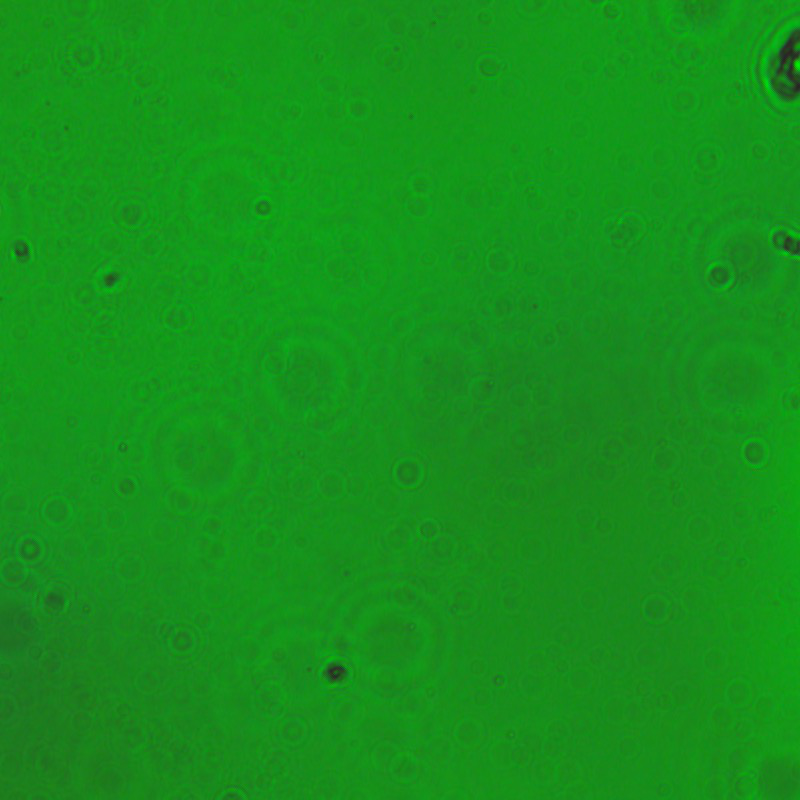

In [26]:
from PIL import Image, ImageFile

pth = '/media/SSD/rheology2023/Glycerol/GLY10/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719_0000000002.jpg'
Image.open(pth)

['/media/SSD/rheology2023/Glycerol/GLY10/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719_0000000001.jpg /media/SSD/rheology2023/Glycerol/GLY10/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719_0000000002.jpg /media/SSD/rheology2023/Glycerol/GLY10/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719_0000000003.jpg /media/SSD/rheology2023/Glycerol/GLY10/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719_0000000004.jpg /media/SSD/rheology2023/Glycerol/GLY10/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719_0000000005.jpg',
 '/media/SSD/rheology2023/Glycerol/GLY10/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719_0000000002.jpg /media/SSD/rheology2023/Glycerol/GLY10/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719_0000000003.jpg /media/SSD/rheology2023/Glycerol/GLY10/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719_0000000004.jpg /media/SSD/rheology2023/Glycerol/GLY10/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719_0000000005.jpg /media/SSD/rheology2023/Glycerol/GLY10/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719_0000000006.jpg',

In [28]:
meta_data = ['/media/SSD/rheology2023/Glycerol/GLY10/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719_0000000048.jpg /media/SSD/rheology2023/Glycerol/GLY10/GLY10P140_D0_30HZ_20XINF_UWELL_20221230_080719/CLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719_0000000049.jpg /media/SSD/rheology2023/Glycerol/GLY10/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719_0000000050.jpg /media/SSD/rheology2023/Glycerol/GLY10/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719_0000000051.jpg /media/SSD/rheology2023/Glycerol/GLY10/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719_0000000052.jpg', 
                '/media/SSD/rheology2023/Glycerol/GLY10/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719_0000000001.jpg /media/SSD/rheology2023/Glycerol/GLY10/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719_0000000002.jpg /media/SSD/rheology2023/Glycerol/GLY10/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719_0000000003.jpg /media/SSD/rheology2023/Glycerol/GLY10/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719_0000000004.jpg /media/SSD/rheology2023/Glycerol/GLY10/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719_0000000005.jpg',
                    '/media/SSD/rheology2023/Glycerol/GLY10/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719_0000001000.jpg /media/SSD/rheology2023/Glycerol/GLY10/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719_0000001001.jpg /media/SSD/rheology2023/Glycerol/GLY10/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719_0000001002.jpg /media/SSD/rheology2023/Glycerol/GLY10/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719_0000001003.jpg /media/SSD/rheology2023/Glycerol/GLY10/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719_0000001004.jpg']
            
print(len(meta_data))
meta_data

3


['/media/SSD/rheology2023/Glycerol/GLY10/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719_0000000048.jpg /media/SSD/rheology2023/Glycerol/GLY10/GLY10P140_D0_30HZ_20XINF_UWELL_20221230_080719/CLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719_0000000049.jpg /media/SSD/rheology2023/Glycerol/GLY10/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719_0000000050.jpg /media/SSD/rheology2023/Glycerol/GLY10/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719_0000000051.jpg /media/SSD/rheology2023/Glycerol/GLY10/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719_0000000052.jpg',
 '/media/SSD/rheology2023/Glycerol/GLY10/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719_0000000001.jpg /media/SSD/rheology2023/Glycerol/GLY10/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719/GLY10P100_D0_30HZ_20

In [29]:
testlist = []

for seq in meta_data:
    _except = []
    img1_path, img2_path, img3_path, img4_path, img5_path = seq.split(' ')
    sub_testlist = [img1_path,img2_path,img3_path,img4_path, img5_path]
    ## Check Images Broken 
    for file in sub_testlist:
        try:
            img = Image.open(file)  # open the image file
            img.verify()  # verify that it is, in fact an image
        except (IOError, SyntaxError) as e:
#             print(e)
#             print(file)
            _except.append(file)
    if len(_except) == 0:
        #testlist.append([img1_path,img2_path,img3_path,img4_path, img5_path])
        testlist.append(sub_testlist)

In [39]:
def img_verify(sub_testlist):
    _except = []
    for file in sub_testlist:
        try:
            img = Image.open(file)  # open the image file
            img.verify()  # verify that it is, in fact an image
        except (IOError, SyntaxError) as e:
            _except.append(file)
    return _except 

In [41]:
testlist = []

for seq in meta_data:
    img1_path, img2_path, img3_path, img4_path, img5_path = seq.split(' ')
    sub_testlist = [img1_path,img2_path,img3_path,img4_path, img5_path]
    ## Check Images Broken 
    _except = img_verify(sub_testlist)
    if len(_except) == 0:
        testlist.append(sub_testlist)

In [42]:
print(len(testlist))
testlist

2


[['/media/SSD/rheology2023/Glycerol/GLY10/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719_0000000001.jpg',
  '/media/SSD/rheology2023/Glycerol/GLY10/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719_0000000002.jpg',
  '/media/SSD/rheology2023/Glycerol/GLY10/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719_0000000003.jpg',
  '/media/SSD/rheology2023/Glycerol/GLY10/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719_0000000004.jpg',
  '/media/SSD/rheology2023/Glycerol/GLY10/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719_0000000005.jpg'],
 ['/media/SSD/rheology2023/Glycerol/GLY10/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719_0000001000.jpg',
  '/media/SSD/rheology2023/Glycerol/GLY10/GLY10P100_D0_30HZ_20XINF_UWELL_20221230

In [43]:
len(_except)

0

In [44]:
testlist[0]

['/media/SSD/rheology2023/Glycerol/GLY10/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719_0000000001.jpg',
 '/media/SSD/rheology2023/Glycerol/GLY10/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719_0000000002.jpg',
 '/media/SSD/rheology2023/Glycerol/GLY10/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719_0000000003.jpg',
 '/media/SSD/rheology2023/Glycerol/GLY10/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719_0000000004.jpg',
 '/media/SSD/rheology2023/Glycerol/GLY10/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719_0000000005.jpg']

In [45]:
testlist[1]

['/media/SSD/rheology2023/Glycerol/GLY10/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719_0000001000.jpg',
 '/media/SSD/rheology2023/Glycerol/GLY10/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719_0000001001.jpg',
 '/media/SSD/rheology2023/Glycerol/GLY10/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719_0000001002.jpg',
 '/media/SSD/rheology2023/Glycerol/GLY10/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719_0000001003.jpg',
 '/media/SSD/rheology2023/Glycerol/GLY10/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719_0000001004.jpg']

In [46]:
images = [Image.open(pth) for pth in testlist[0]]
images

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x800>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x800>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x800>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x800>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x800>]

In [47]:
images1 = [Image.open(pth) for pth in testlist[1]]
images1

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x800>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x800>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x800>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x800>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x800>]

In [19]:
fileall = []

for file in testlist[0]:
    try:
        img = Image.open(file)  # open the image file
        img.verify()  # verify that it is, in fact an image
    except (IOError, SyntaxError) as e:
        print(e)
        print(file)
        fileall.append(file)

[Errno 2] No such file or directory: '/media/SSD/rheology2023/Glycerol/GLY10/GLY10P140_D0_30HZ_20XINF_UWELL_20221230_080719/CLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719_0000000049.jpg'
/media/SSD/rheology2023/Glycerol/GLY10/GLY10P140_D0_30HZ_20XINF_UWELL_20221230_080719/CLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719_0000000049.jpg


In [32]:
img1_path

'/media/SSD/rheology2023/Glycerol/GLY10/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_080719_0000000001.jpg'

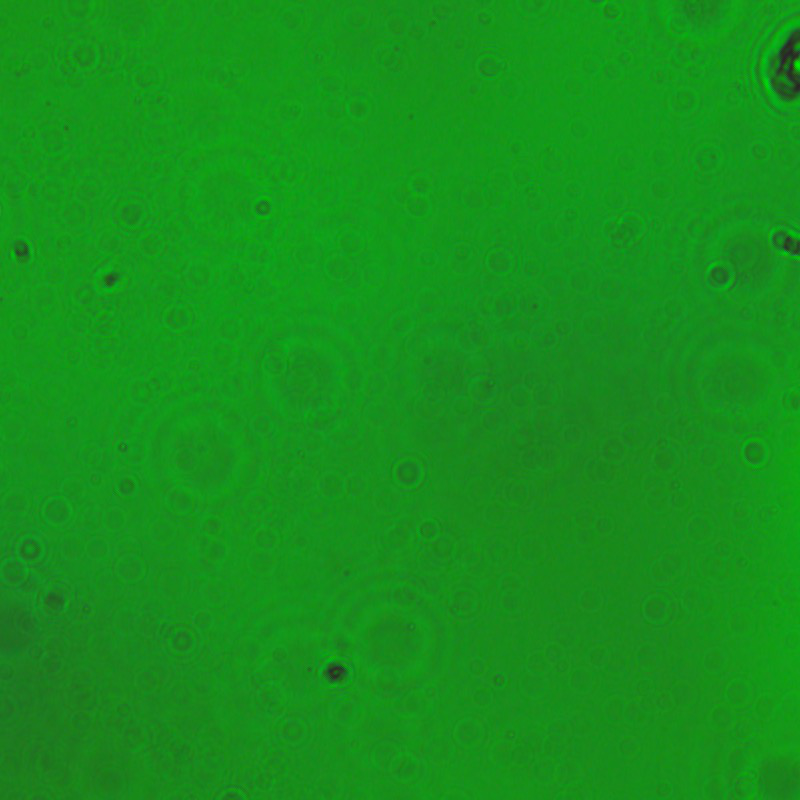

In [10]:
Image.open(img1_path)